In [1]:
from petrel_well_file_readers import *
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import lasio

In [2]:
folder=r"..\d11_data\\"
dev_file=folder+'nec25_a1_dev.dat'
las_file=folder+'nec25_a1.las'
las=lasio.read(las_file)

well_tops_file=folder+'d11_welltops_payzones_220519_sai.dat'
# well_tops_file=folder+'Sunder_WellTops_SR.dat'
# well_tops_file=folder+'manabesh_sand_zones.dat'
wt=read_welltops(well_tops_file)
wt=wt.sort_values(['MD'])

chkt_file=folder+"nec25_a1_chkt.dat"
chkt=read_chkt(chkt_file)
X=chkt['MD'].values
X.shape=len(X),1
y=chkt['TWT picked'].values
md2twt = LinearRegression().fit(X, y)

wells_names=wt.Well.unique()
# wt.Surface.unique()
wt['MD'].values.astype(float)

# wt.Surface.unique()
# wt[wt.Surface.isin(req_tops)][wt.Well=='NEC25-A1']
well_name=wells_names[0]
wt[wt.Well==well_name].Surface.values
# sand_tops

array(['Lower Pliocene', 'Water Bottom', 'Deeper Cut_Top',
       'Deeper Cut_Bottom', 'Miocene', 'Sand Pay4_Top',
       'Sand Pay4_Bottom', 'Sand Pay3_Top', 'GWC A1_Pay3',
       'Sand Pay3_Bottom', 'Sand Pay2_Top', 'GWC_A1_Pay2',
       'Sand Pay2_Bottom', 'Sand1_Top', 'Sand1_Bottom', 'Sand 0 Top',
       'Sand 0 Bottom', 'Sand-1_Top', 'Sand-1_Bottom',
       'Shallow Cut_Bottom'], dtype=object)

In [3]:
sand_tops=[s for s in wt[wt.Well==well_name].Surface.values if 'sand' in s.lower()]
sand_tops
req_tops=['Sand Pay3_Top','GWC A1_Pay3', 'Sand Pay3_Bottom']
# req_tops=['Sand Pay2_Top', 'GWC_A1_Pay2','Sand Pay2_Bottom',]

drange=wt[wt.Surface.isin(req_tops)][wt.Well==well_name].MD.values.astype(float)
drange

C:\Users\user2\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


array([2029.98, 2038.76, 2067.72])

In [4]:
# drange,len(drange),
top_down_dist=20
zones=[[drange[0]-top_down_dist, drange[0]], [drange[0], drange[1]], [drange[1], drange[2]]]
zones

[[2009.98, 2029.98], [2029.98, 2038.76], [2038.76, 2067.72]]

In [5]:

ldf=las.df()
i=0
drangeindx=(ldf.index>drange[i]-top_down_dist) & (ldf.index<drange[i+1]+top_down_dist)
def get_dfindexids(df,drange):
    return (ldf.index>drange[0]) & (ldf.index<drange[1])
def get_meanvalInzones(ldf,zones,logslist=['DTCO', 'DTSM','RHOB']):
    zonewiseprops=[]
    for zone in zones:
        drangeindx=get_dfindexids(ldf,zone)
        props=[]
        for l in logslist:
            props.append(np.mean(ldf[drangeindx][l].values))
        zonewiseprops.append(props)
    return zonewiseprops

layer_properties=get_meanvalInzones(ldf,zones,logslist=['DTCO', 'DTSM','RHOB'])
# drange[i],drange[i+1],
# ldf[drangeindx]['DTCO'].values,ldf[drangeindx]['DTSM'].values
# 
# vp_log=0.3048*10**6/ldf[drangeindx]['DTCO'].values
# vs_log=0.3048*10**6/ldf[drangeindx]['DTSM'].values
# rho_log=ldf[drangeindx]['RHOB'].values
thickness=zones[1][1]-zones[1][0]
layer_properties
vpvsrho=[[0.3048*10**6/l[0], 0.3048*10**6/l[1],l[2]] for l in layer_properties]
vpvsrho=np.array(vpvsrho)
# md=ldf[drangeindx].index
vp,vs,rho=vpvsrho[:,0],vpvsrho[:,1],vpvsrho[:,2]
(vpvsrho),thickness,vp,vs,rho
print('vp_mod = [{:3.2f},{:3.2f},{:3.2f}]'.format(*vp))
print('vs_mod = [{:3.2f},{:3.2f},{:3.2f}]'.format(*vs))
print('rho_mod = [{:3.2f},{:3.2f},{:3.2f}]'.format(*rho))
print('thickness = {:3.2}'.format(thickness))

vp_mod = [2935.96,2917.22,2993.72]
vs_mod = [1634.27,1700.79,1644.88]
rho_mod = [2.43,2.21,2.32]
thickness = 8.8


In [6]:
# req_tops=['Sand Pay3_Top','GWC A1_Pay3', 'Sand Pay3_Bottom']
# vp_mod = [2935.96,2917.22,2993.72]
# vs_mod = [1634.27,1700.79,1644.88]
# rho_mod = [2.43,2.21,2.32]
# thickness = 8.8

# req_tops=['Sand Pay2_Top', 'GWC_A1_Pay2','Sand Pay2_Bottom',]
# vp_mod = [3076.56,3060.02,3052.61]
# vs_mod = [1682.84,1749.52,1667.72]
# rho_mod = [2.38,2.30,2.43]
# thickness = 7.5

In [7]:
vp,vs,rho,thickness

(array([2935.95721599, 2917.2204535 , 2993.71947321]),
 array([1634.2653648 , 1700.79106897, 1644.88043111]),
 array([2.43297803, 2.20755965, 2.31956526]),
 8.779999999999973)

finished step 0
finished step 1
finished step 2
finished step 3
finished step 4
finished step 5
finished step 6
finished step 7
finished step 8
finished step 9
finished step 10
finished step 11
finished step 12
finished step 13
finished step 14
finished step 15
finished step 16
finished step 17
finished step 18
finished step 19
finished step 20
finished step 21
finished step 22
finished step 23
finished step 24
finished step 25
finished step 26
finished step 27
finished step 28
finished step 29
finished step 30
finished step 31
finished step 32
finished step 33
finished step 34
finished step 35
finished step 36
finished step 37
finished step 38
finished step 39
finished step 40
finished step 41
finished step 42
finished step 43
finished step 44
finished step 45
finished step 46
finished step 47
finished step 48
finished step 49
finished step 50
finished step 51
finished step 52
finished step 53
finished step 54
finished step 55
finished step 56
finished step 57
finished step 58
finishe

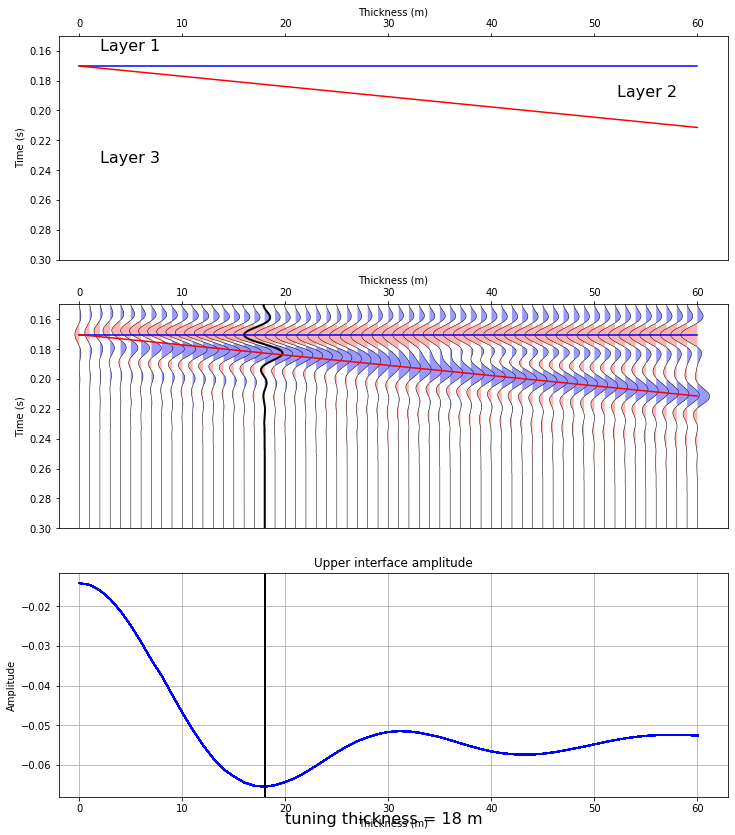



Starting synthetic calcuations...

Calculated angle 0
Calculated angle 1
Calculated angle 2
Calculated angle 3
Calculated angle 4
Calculated angle 5
Calculated angle 6
Calculated angle 7
Calculated angle 8
Calculated angle 9
Calculated angle 10
Calculated angle 11
Calculated angle 12
Calculated angle 13
Calculated angle 14
Calculated angle 15
Calculated angle 16
Calculated angle 17
Calculated angle 18
Calculated angle 19
Calculated angle 20
Calculated angle 21
Calculated angle 22
Calculated angle 23
Calculated angle 24
Calculated angle 25
Calculated angle 26
Calculated angle 27
Calculated angle 28
Calculated angle 29
Calculated angle 30
Calculated angle 31
Calculated angle 32
Calculated angle 33
Calculated angle 34
Calculated angle 35
Calculated angle 36
Calculated angle 37
Calculated angle 38
Calculated angle 39
Calculated angle 40



  Method       NI         GRAD
---------------------------------
 Zoeppritz   -0.05167     0.00473
 Convolved  -0.04158     0.01337


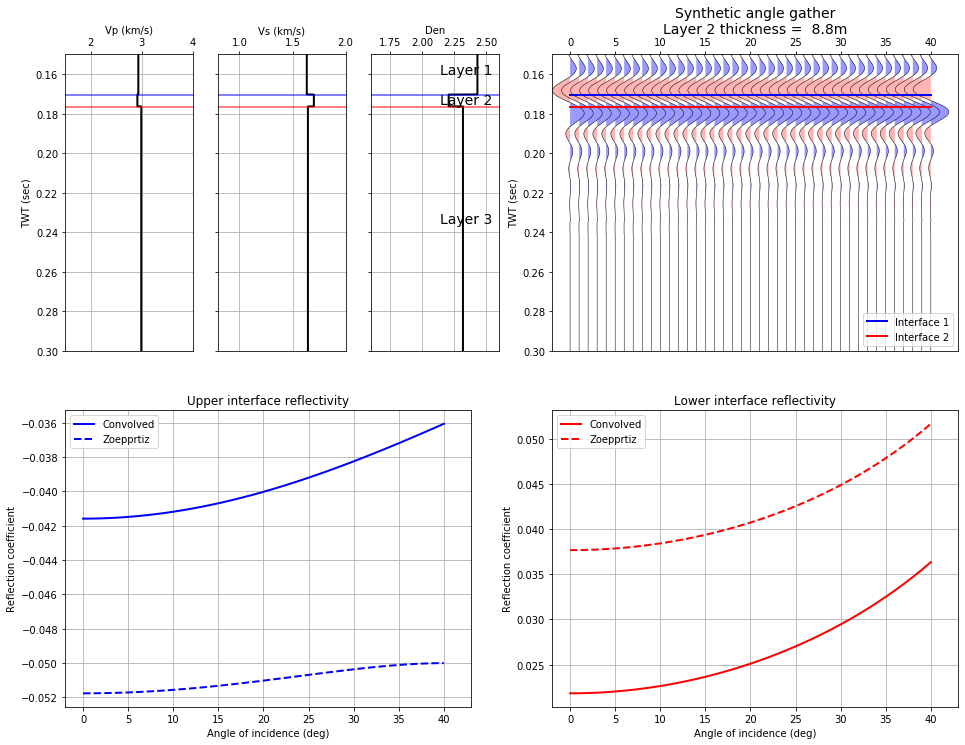

In [8]:
from tuning_wedge_v2 import *
from tuning_prestack_v2 import *
fig_halfpath='D:\\Ameyem\\python\\inversion&spect_decomp\\d11-out\\'+well_name+'_'+req_tops[0].replace(' ','_')
wvlt_params={'wvlt_type':'bandpass', 
            'wvlt_length': 0.128, 
            'wvlt_phase': 0.0 ,  # Wavelet phase in degrees
            'wvlt_scalar' : 1.0,  # Multiplier to scale wavelet amplitude (default = 1.0)
            'wvlt_cfreq' : 30.0 , # Ricker wavelet central frequency
            'f1' :  5.0   ,      # Bandpass wavelet low truncation frequency
            'f2' : 10.0  ,        # Bandpass wavelet low cut frequency
            'f3' : 50.0  ,        # Bandpass wavelet high cut frequency
            'f4' : 65.0          # Bandpass wavelet high truncation frequency
    }
trace_params={'tmin' : 0.0,'tmax' : 0.5,'dt' : 0.0001} # changing this from 0.0001 can affect the display quality
wedge_plot_params={ 'min_plot_time' : 0.15, 'max_plot_time' : 0.3, 'excursion' : 2,'figure_path':fig_halfpath+'_wedge.png'}
angle_plot_params={ 'min_plot_time' : 0.15, 'max_plot_time' : 0.3, 'excursion' : 2,'figure_path':fig_halfpath+'_angle.png'}    

myWedge(vp,vs,rho,thickness,dz_params=(0,60,1), wvlt_params=wvlt_params, trace_params=trace_params,
    plot_params=wedge_plot_params)
myAngleModel(vp,vs,rho,thickness,theta_params=(0,40,1), wvlt_params=wvlt_params, trace_params=trace_params,
    plot_params=angle_plot_params)


finished step 0
finished step 1
finished step 2
finished step 3
finished step 4
finished step 5
finished step 6
finished step 7
finished step 8
finished step 9
finished step 10
finished step 11
finished step 12
finished step 13
finished step 14
finished step 15
finished step 16
finished step 17
finished step 18
finished step 19
finished step 20
finished step 21
finished step 22
finished step 23
finished step 24
finished step 25
finished step 26
finished step 27
finished step 28
finished step 29
finished step 30
finished step 31
finished step 32
finished step 33
finished step 34
finished step 35
finished step 36
finished step 37
finished step 38
finished step 39
finished step 40
finished step 41
finished step 42
finished step 43
finished step 44
finished step 45
finished step 46
finished step 47
finished step 48
finished step 49
finished step 50
finished step 51
finished step 52
finished step 53
finished step 54
finished step 55
finished step 56
finished step 57
finished step 58
finishe

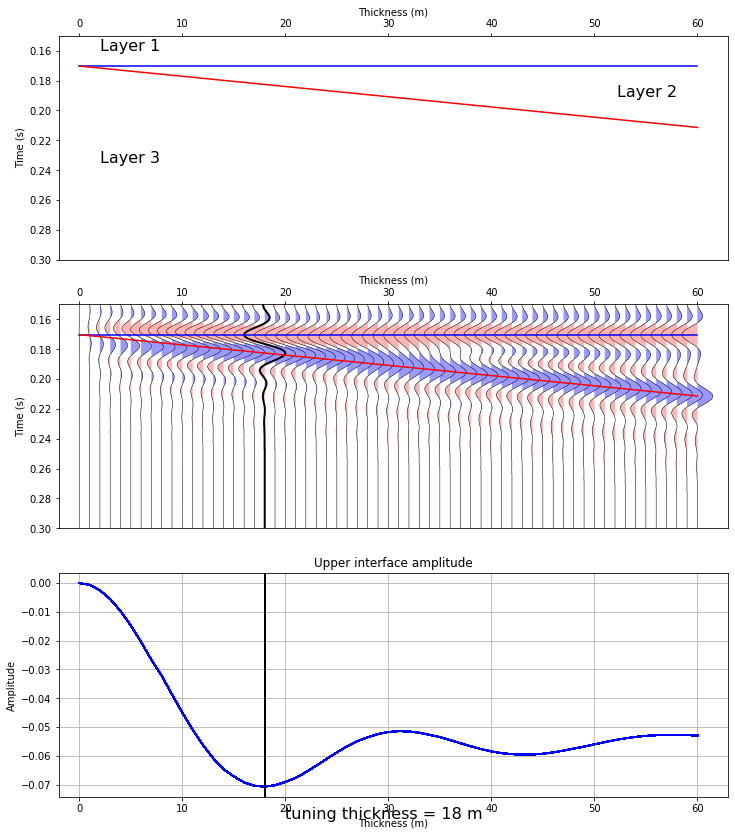



Starting synthetic calcuations...

Calculated angle 0
Calculated angle 1
Calculated angle 2
Calculated angle 3
Calculated angle 4
Calculated angle 5
Calculated angle 6
Calculated angle 7
Calculated angle 8
Calculated angle 9
Calculated angle 10
Calculated angle 11
Calculated angle 12
Calculated angle 13
Calculated angle 14
Calculated angle 15
Calculated angle 16
Calculated angle 17
Calculated angle 18
Calculated angle 19
Calculated angle 20
Calculated angle 21
Calculated angle 22
Calculated angle 23
Calculated angle 24
Calculated angle 25
Calculated angle 26
Calculated angle 27
Calculated angle 28
Calculated angle 29
Calculated angle 30
Calculated angle 31
Calculated angle 32
Calculated angle 33
Calculated angle 34
Calculated angle 35
Calculated angle 36
Calculated angle 37
Calculated angle 38
Calculated angle 39
Calculated angle 40



  Method       NI         GRAD
---------------------------------
 Zoeppritz   -0.05167     0.00473
 Convolved  -0.03770     0.00257


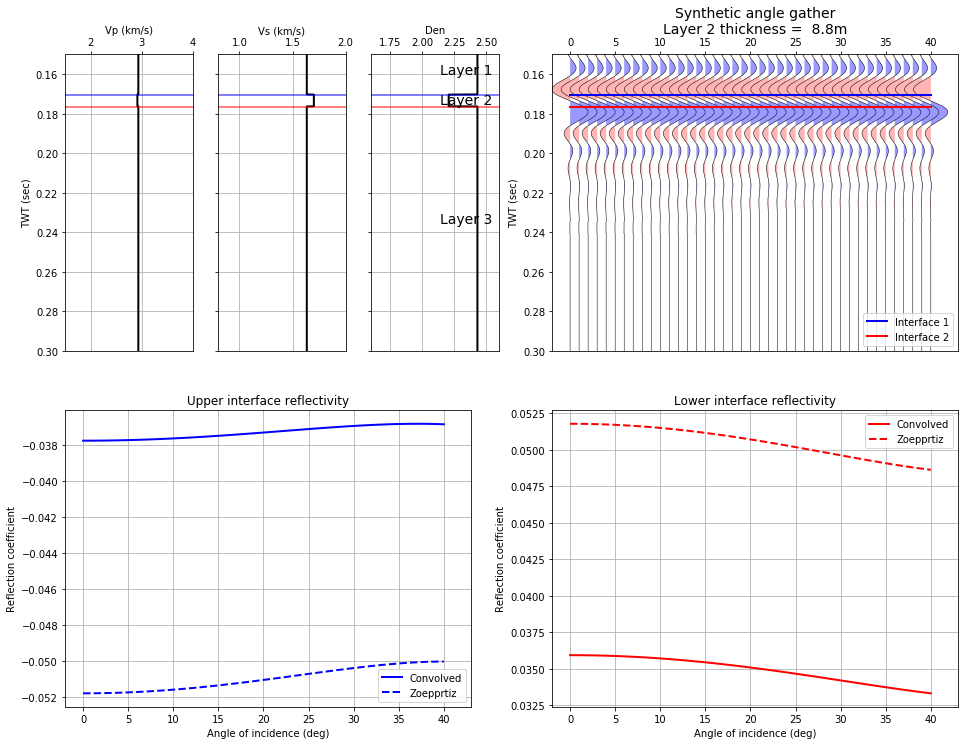

In [9]:
vp_mod,vs_mod,rho_mod=vp,vs,rho
vp_mod[-1],vs_mod[-1],rho_mod[-1]=vp_mod[0],vs_mod[0],rho_mod[0]
wedge_plot_params={ 'min_plot_time' : 0.15, 'max_plot_time' : 0.3, 'excursion' : 2,'figure_path':fig_halfpath+'_wedge_shaledown.png'}
angle_plot_params={ 'min_plot_time' : 0.15, 'max_plot_time' : 0.3, 'excursion' : 2,'figure_path':fig_halfpath+'_angle_shaledown.png'}    

myWedge(vp_mod,vs_mod,rho_mod,thickness,dz_params=(0,60,1), wvlt_params=wvlt_params, trace_params=trace_params,
    plot_params=wedge_plot_params)
myAngleModel(vp_mod,vs_mod,rho_mod,thickness,theta_params=(0,40,1), wvlt_params=wvlt_params, trace_params=trace_params,
    plot_params=angle_plot_params)
